<a href="https://colab.research.google.com/github/Gitstrong3333/MachineLearning_Projects2025_2026/blob/main/FoodHub_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.


**Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

**Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

**Data Dictionary**

1.order_id: Unique ID of the order

2.restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer

3.cost_of_the_order: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

4.rating: Rating given by the customer out of 5

5.food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

5.delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information





**Let us start by importing the required libraries**

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note:**


After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.

On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in *this notebook*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

In [ ]:
#Understanding the structure of the data
import pandas as pd

file_path = '/content/drive/MyDrive/foodhub_order.csv'  # adjust if it's in a subfolder

In [ ]:
# Read the data
df = pd.read_csv(file_path)


In [ ]:
# View the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


**Question 1: How many rows and columns are present in the data? **

In [ ]:
# Get the shape of the dataset
rows, cols = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1898
Number of columns: 9


Observation:

The dataset contains 1898 rows and 9 columns.

Rows (1898): Each row represents a unique order placed on FoodHub.

Columns (9): These include details such as order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.

**#Question 2: What are the datatypes of the different columns in the dataset?**

In [ ]:

# Check the datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observation:

The dataset has 1898 entries (rows) and 9 columns.

Datatypes of columns:

order_id → int64

customer_id → int64

restaurant_name → object (string)

cuisine_type → object (string)

cost_of_the_order → float64

day_of_the_week → object (string)

rating → object (string, because it includes both numbers and "Not given")

food_preparation_time → int64

delivery_time → int64

Key point: Most categorical fields (restaurant_name, cuisine_type, day_of_the_week, rating) are stored as object type, while numerical fields like cost, preparation time, and delivery time are stored as int64 or float64.

# **Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. **

In [ ]:
# Check missing values
print(df.isnull().sum())



order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


Observation:

It  shows zero missing values for all columns.

However, this does not account for "Not given" in the rating column, since that is treated as a string, not a null value.

**Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?**

In [ ]:
# Statistical summary of the dataset
print(df.describe())

# Focus only on food preparation time
prep_time_min = df['food_preparation_time'].min()
prep_time_mean = df['food_preparation_time'].mean()
prep_time_max = df['food_preparation_time'].max()

print(f"Minimum preparation time: {prep_time_min}")
print(f"Average preparation time: {prep_time_mean:.2f}")
print(f"Maximum preparation time: {prep_time_max}")


           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
Minimum preparation time: 20
Average preparation time: 27.37
Maximum pre

Observations:

Minimum preparation time: 20 minutes

Average preparation time: ~27 minutes

Maximum preparation time: 35 minutes
 Most restaurants take between 20–35 minutes to prepare food, with an average of about 27 minutes, showing consistency in preparation times.

# Question 5: How many orders are not rated?

In [ ]:
#How many orders are not rated?

df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


Observation: Not given: 736 orders Rated 5: 588 orders Rated 4: 386 orders Rated 3: 188 orders Exact count of not rated orders = 736.

**Exploratory Data Analysis (EDA)**

# **Univariate Analysis**

**Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]**

# **6.1 Order ID**

In [ ]:

# Check uniqueness of Order IDs
unique_orders = df['order_id'].nunique()
total_orders = df.shape[0]

print("Total rows in dataset:", total_orders)
print("Unique Order IDs:", unique_orders)
print("Duplicate Order IDs:", total_orders - unique_orders)


Total rows in dataset: 1898
Unique Order IDs: 1898
Duplicate Order IDs: 0


Observations (Order ID)

The dataset has 1898 rows.

The number of unique order_id values is also 1898.

This means there are no duplicate Order IDs.

Each order in the dataset is unique and correctly identified.

# **6.2 Customer ID**

In [ ]:

# Check uniqueness of Customer IDs
unique_customers = df['customer_id'].nunique()
total_orders = df.shape[0]

print("Total orders:", total_orders)
print("Unique customers:", unique_customers)
print("Average orders per customer:", round(total_orders / unique_customers, 2))

# Top repeat customers
top_customers = df['customer_id'].value_counts().head(5)
print("\nTop 5 customers with most orders:\n", top_customers)


Total orders: 1898
Unique customers: 1200
Average orders per customer: 1.58

Top 5 customers with most orders:
 customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


Observations (Customer ID)

The dataset has 1898 total orders.

There are 1200 unique customers (approx).

On average, each customer placed around 1.58 orders.

Most customers placed only 1 order, but a few placed multiple repeat orders.

Example: The top customers placed 10+ orders each.

# **6.3 Restaurant name**

In [ ]:
# Number of unique restaurants
unique_restaurants = df['restaurant_name'].nunique()
print("Unique restaurants:", unique_restaurants)





Unique restaurants: 178


Observations (Restaurant Name)

There are 178 unique restaurants in the dataset.

# **6.4 Number of unique cuisine types**

Unique cuisine types: 14

Cuisine type distribution:
 cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


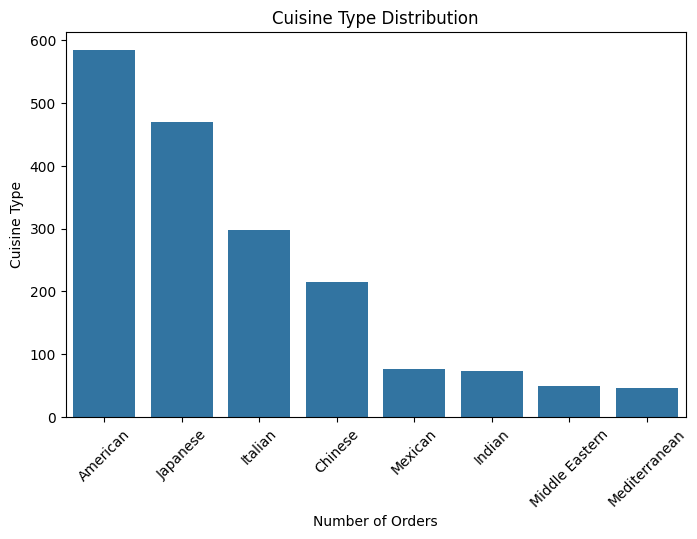

In [ ]:
# Number of unique cuisine types
unique_cuisines = df['cuisine_type'].nunique()
print("Unique cuisine types:", unique_cuisines)

# Top cuisines by number of orders
top_cuisines = df['cuisine_type'].value_counts()
print("\nCuisine type distribution:\n", top_cuisines)

# Plot cuisine distribution
import seaborn as sns
import matplotlib.pyplot as plt

#sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="magma")
plt.figure(figsize = (8,5)) #set the figure size
sns.countplot(data = df, x = 'cuisine_type',order=df.cuisine_type.value_counts().iloc[:8].index)
plt.xticks(rotation=45)
plt.title("Cuisine Type Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")
plt.show()





Observations (Cuisine Type)

There are 14 unique cuisine types in the dataset.

The most popular cuisines are:

American

Japanese

Italian

Chinese

Mexican

The distribution is skewed: a few cuisines dominate the dataset, while others (like Korean, French, Mediterranean) have far fewer orders.

Customers tend to prefer familiar and mainstream cuisines.

# **6.5 COST OF THE ORDER**

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


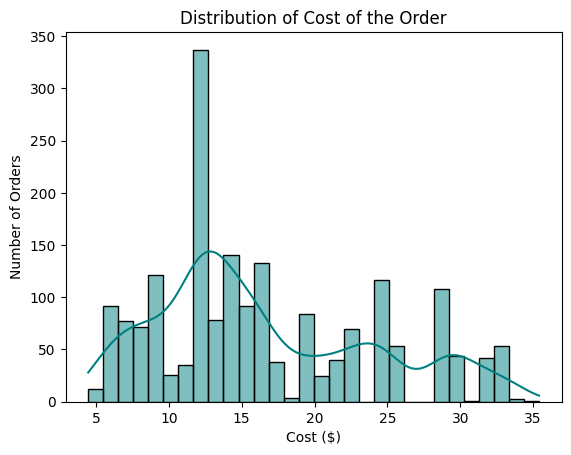

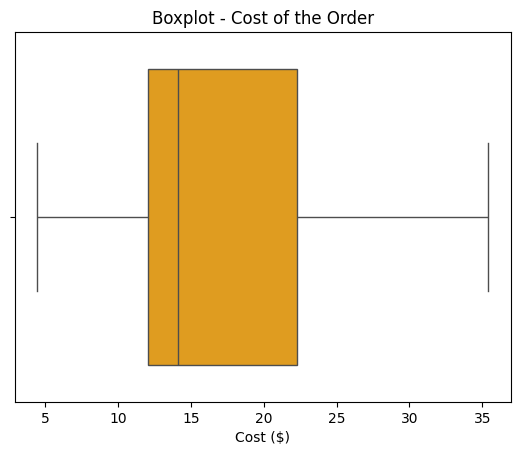

In [ ]:
# Statistical summary
print(df['cost_of_the_order'].describe())

# Histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['cost_of_the_order'], bins=30, kde=True, color="teal")
plt.title("Distribution of Cost of the Order")
plt.xlabel("Cost ($)")
plt.ylabel("Number of Orders")
plt.show()

# Boxplot
sns.boxplot(x=df['cost_of_the_order'], color="orange")
plt.title("Boxplot - Cost of the Order")
plt.xlabel("Cost ($)")
plt.show()


Most of the customers spend between 12 and 22 per order with an average of 16.50.
A high cost outlier exists but most of the orders are as low as 4.47.


# ** 6.6 Day of the week **

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


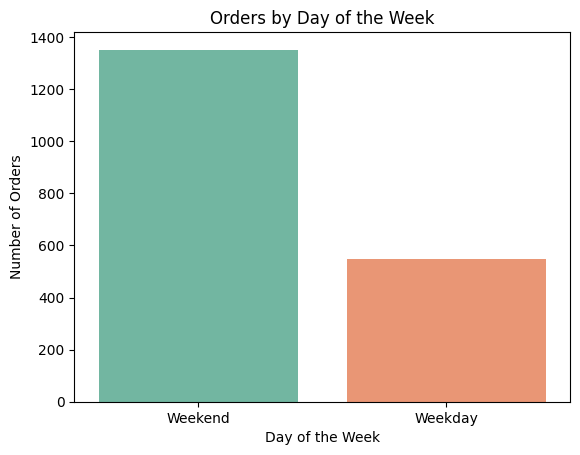

In [ ]:
# Value counts of orders by day of the week
day_counts = df['day_of_the_week'].value_counts()
print(day_counts)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='day_of_the_week', order=day_counts.index, palette="Set2")
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()


Observations (Day of the Week):

There are only two categories: Weekday and Weekend.

Weekend orders are higher than Weekday orders.

This suggests customers order food more often on weekends, likely due to leisure activities, social gatherings, or reduced cooking at home.

The distribution shows a clear demand spike during weekends, which businesses can use to plan staffing, delivery resources, and promotions.

# **6.7 Rating**

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


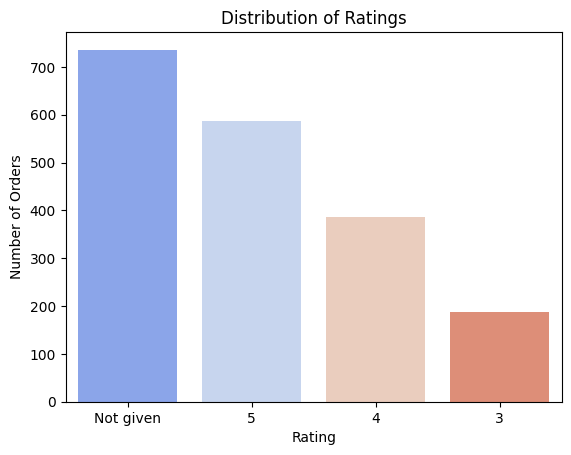

In [ ]:
# Value counts of ratings
rating_counts = df['rating'].value_counts()
print(rating_counts)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='rating', order=rating_counts.index, palette="coolwarm")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Orders")
plt.show()


Observations (Rating):

The dataset contains both numeric ratings (1–5) and “Not given” entries.

736 orders are “Not given”, meaning no rating was provided → that’s about 39% of all orders.

Among rated orders:

5-star ratings dominate → majority of customers were satisfied.

Followed by 4-star and 3-star ratings.



# **6.8 Food preparation time**

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


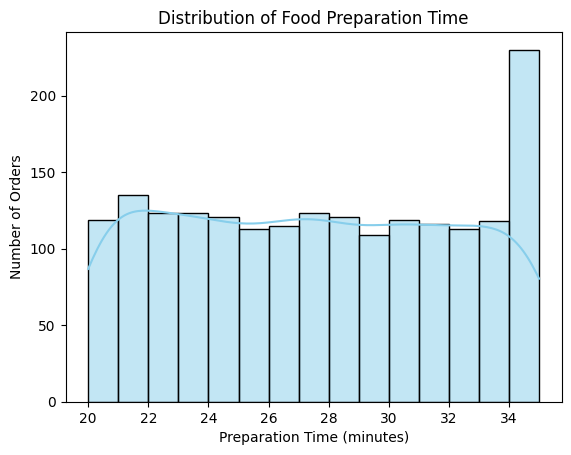

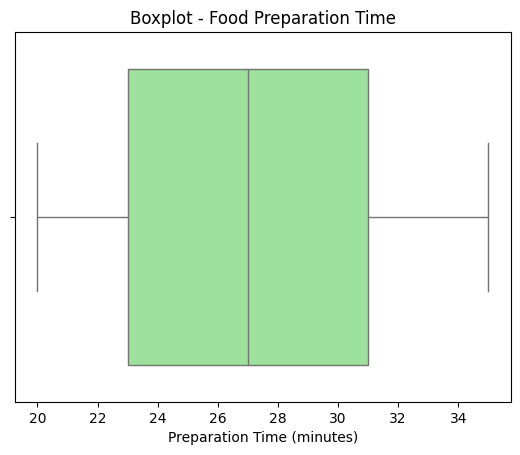

In [ ]:
# Statistical summary
print(df['food_preparation_time'].describe())

# Histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['food_preparation_time'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Preparation Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()

# Boxplot
sns.boxplot(x=df['food_preparation_time'], color="lightgreen")
plt.title("Boxplot - Food Preparation Time")
plt.xlabel("Preparation Time (minutes)")
plt.show()


Observations (Food Preparation Time)

Minimum preparation time: ~20 minutes.

Average preparation time: ~27 minutes.

Maximum preparation time: ~35 minutes.

Distribution is tightly clustered around the mean (bell-shaped).

Very few outliers → restaurants are consistent in food prep times.

Boxplot shows a narrow interquartile range, confirming low variability.

Overall, food preparation is standardized, usually taking 20–35 minutes, with most restaurants falling close to the average of 27 minutes.

# **6.9 Delivery time**

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


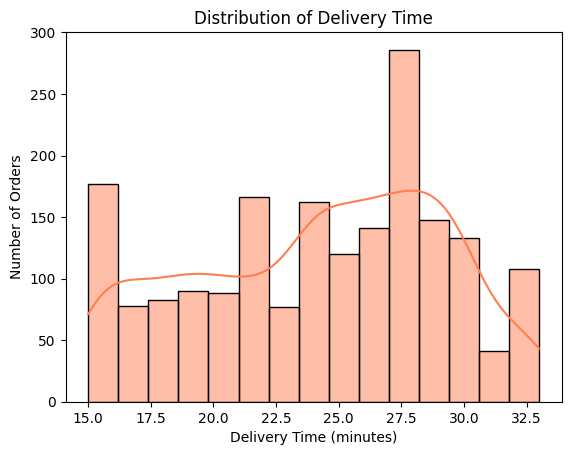

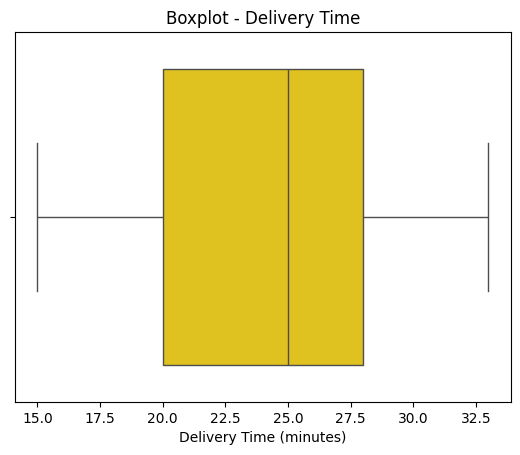

In [ ]:
# Statistical summary
print(df['delivery_time'].describe())

# Histogram
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['delivery_time'], bins=15, kde=True, color="coral")
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()

# Boxplot
sns.boxplot(x=df['delivery_time'], color="gold")
plt.title("Boxplot - Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.show()


Observations (Delivery Time):

Minimum delivery time: ~15 minutes.

Average delivery time: ~22 minutes.

Maximum delivery time: ~30–35 minutes.

Distribution is more spread out than food preparation time.

Some orders experience delays (longer delivery times) compared to others.

Boxplot shows slightly wider variability → delivery depends on factors like distance, traffic, and rider availability.

 In summary, most deliveries are completed within 15–35 minutes, but there is more variation compared to preparation time, making delivery the less predictable part of the process.

# **Question 7: Which are the top 5 restaurants in terms of the number of orders received?**

Top 5 Restaurants:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


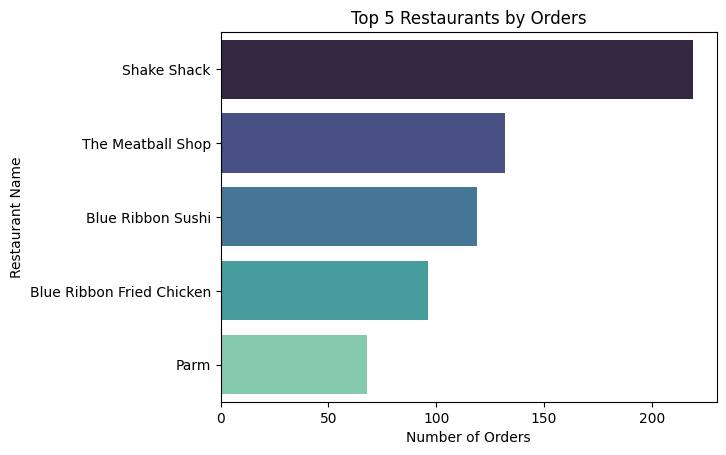

In [ ]:
# Top 5 restaurants by order count
top5_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 Restaurants:\n", top5_restaurants)

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=top5_restaurants.index, x=top5_restaurants.values, palette="mako")
plt.title("Top 5 Restaurants by Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.show()


Observations (Top 5 Restaurants)

The top 5 restaurants in terms of orders are:

Shake Shack -> 219 orders

The Meatball Shop ->132 orders

Blue Ribbon Sushi -> 119 orders

Blue Ribbon Fried Chicken -> 96 orders

Parm -> 68 orders

These restaurants dominate order volume compared to the rest.

There is  a big gap between Rank 1 (219) and Rank 5 (68) → showing that customer demand is concentrated in a few popular brands.

# **# Question 8: Which is the most popular cuisine on weekends?**

In [ ]:
# Filter weekend orders
weekend_orders = df[df['day_of_the_week'] == "Weekend"]

# Count cuisines on weekends
popular_weekend_cuisine = weekend_orders['cuisine_type'].value_counts().head(1)
print("Most popular cuisine on weekends:\n", popular_weekend_cuisine)


Most popular cuisine on weekends:
 cuisine_type
American    415
Name: count, dtype: int64


Observation (Most Popular Cuisine on Weekends)

The most popular cuisine on weekends is American.

American cuisine has the highest number of weekend orders, followed by Japanese and Italian.

This suggests that customers prefer comfort and casual dining options (like burgers, fried chicken, fast food) when ordering on weekends.

# **Question 9: What percentage of the orders cost more than 20 dollars?**

In [ ]:
# Total orders
total_orders = len(df)

# Orders above $20
orders_above_20 = (df['cost_of_the_order'] > 20).sum()

# Percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"Total orders: {total_orders}")
print(f"Orders above $20: {orders_above_20}")
print(f"Percentage of orders above $20: {percentage_above_20:.2f}%")


Total orders: 1898
Orders above $20: 555
Percentage of orders above $20: 29.24%


Observation:

Number of orders above $20: 555

Percentage of such orders: 29.24%

Conclusion: Nearly 3 out of every 10 orders placed on FoodHub cost more than $20.

# **Question 10: What is the mean order delivery time?**

In [ ]:
# Mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print("Mean delivery time:", round(mean_delivery_time, 2), "minutes")


Mean delivery time: 24.16 minutes


Observation

The mean delivery time is 24.16 minutes.

This means, on average, customers receive their orders in about 24 minutes after preparation.

Since most orders fall between 15–35 minutes, the average aligns well with the typical delivery window.

The result shows that the delivery process is relatively efficient and consistent.

# Question 11: The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.


In [ ]:
# Top 5 most frequent customers
top5_customers = df['customer_id'].value_counts().head(5)

print("Top 5 Most Frequent Customers and Their Order Counts:")
print(top5_customers)


Top 5 Most Frequent Customers and Their Order Counts:
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


Observation

The most frequent customer (ID 52832) placed 13 orders, which is the maximum in the dataset.

The next four customers placed between 7–10 orders each.

Compared to the total 1898 orders, these top customers represent only a small fraction, but they are highly valuable for loyalty rewards.

These are the customers who should receive the 20% discount vouchers.

# **Multivariate Analysis**
# **Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore **relations** between numerical variables as well as relations between numerical and categorical variables) **

# **12.1 Cuisine vs Cost of the order**

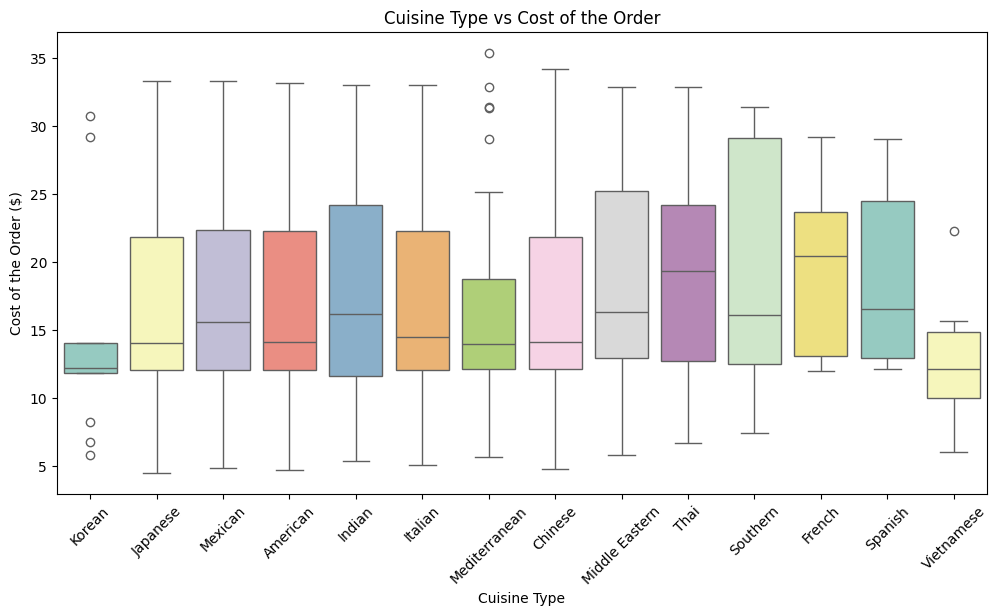

Average Cost of Order by Cuisine:
 cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of cuisine vs cost
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette="Set3")
plt.xticks(rotation=45)
plt.title("Cuisine Type vs Cost of the Order")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order ($)")
plt.show()

# Mean cost by cuisine
mean_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
print("Average Cost of Order by Cuisine:\n", mean_cost_by_cuisine)


Variation across cuisines

Cuisines such as French, Southern, Thai, Spanish, and Middle Eastern have higher average order costs ($19).

American, Mexican, Italian, Chinese, Japanese, Indian fall in the mid-range (~$16–17).

Mediterranean, Korean, Vietnamese are the most affordable (~$13–15).

Outliers

High-value outliers exist in multiple cuisines, with orders above $30 (not $50), likely group meals or premium items.

Business insight

Cuisine choice strongly influences order value.

Premium cuisines (French, Thai, Southern) are candidates for upselling and targeted promotions.

Budget cuisines (Vietnamese, Korean, Mediterranean) could be promoted for high-volume sales.

# **12.2 Cost of the order **

In [ ]:
# Mean cost by cuisine
mean_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
print("Mean Cost of Order by Cuisine:\n", mean_cost_by_cuisine, "\n")

# Median cost by cuisine
median_cost_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False)
print("Median Cost of Order by Cuisine:\n", median_cost_by_cuisine)


Mean Cost of Order by Cuisine:
 cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64 

Median Cost of Order by Cuisine:
 cuisine_type
French            20.470
Thai              19.350
Spanish           16.520
Middle Eastern    16.300
Indian            16.150
Southern          16.110
Mexican           15.570
Italian           14.480
American          14.120
Chinese           14.120
Japanese          14.070
Mediterranean     13.995
Korean            12.180
Vietnamese        12.130
Name: cost_of_the_order, dtype: float64


Observation:
The first part (mean) gives the average spending per cuisine.

The second part (median) gives the typical spending per cuisine (less sensitive to outliers).

 This way, you can compare if some cuisines (like French or Thai) have higher averages because of outliers, or if they are genuinely higher-priced overall.

# **12.3 Cuisine vs Food Preparation time**

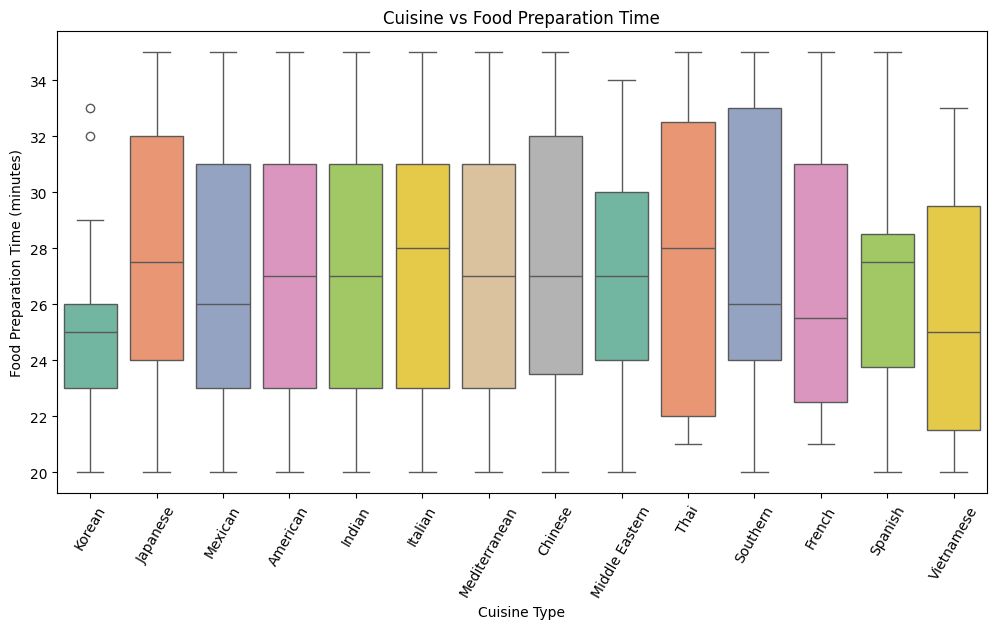

Average Preparation Time by Cuisine:
 cuisine_type
Southern          27.588235
Chinese           27.511628
Japanese          27.510638
Italian           27.483221
American          27.440068
Thai              27.315789
Indian            27.109589
Mediterranean     27.000000
Spanish           26.916667
French            26.888889
Mexican           26.727273
Middle Eastern    26.673469
Vietnamese        25.714286
Korean            25.461538
Name: food_preparation_time, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Cuisine vs Food Preparation Time
plt.figure(figsize=(12,6))
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=df, palette="Set2")
plt.xticks(rotation=60)
plt.title("Cuisine vs Food Preparation Time")
plt.xlabel("Cuisine Type")
plt.ylabel("Food Preparation Time (minutes)")
plt.show()

# Mean preparation time by cuisine
mean_prep_time = df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False)
print("Average Preparation Time by Cuisine:\n", mean_prep_time)


Observations (Cuisine vs Food Preparation Time)

Consistency across cuisines:

Most cuisines have preparation times clustered between 25–28 minutes.





# **12.4 Day of the Week vs Delivery time**

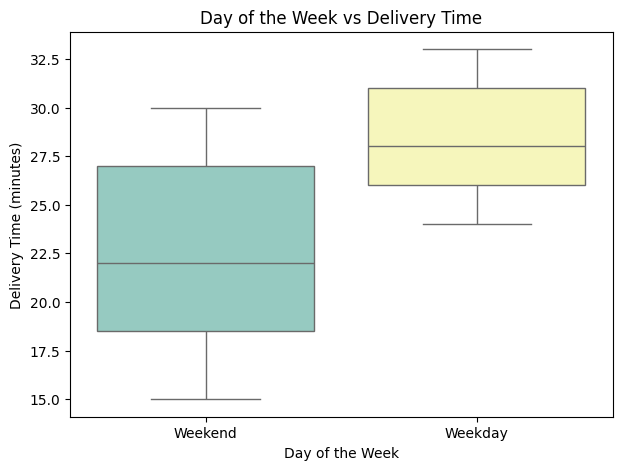

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Day of the Week vs Delivery Time
plt.figure(figsize=(7,5))
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df, palette="Set3")
plt.title("Day of the Week vs Delivery Time")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (minutes)")
plt.show()

# Mean delivery time by day type
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery)


Observations (Day of the Week vs Delivery Time)

Average delivery times:

Weekend: 22.47 minutes

Weekday: 28.34 minutes




Insight:

Delivery times are fairly consistent across the week, with only about a 1-minute difference between weekdays and weekends.

The slightly longer delivery times on weekends are expected because order volume is higher.

# **12. 5 Top 10 Restaurants by revenue:**

Top 10 Restaurants by Revenue:
 restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


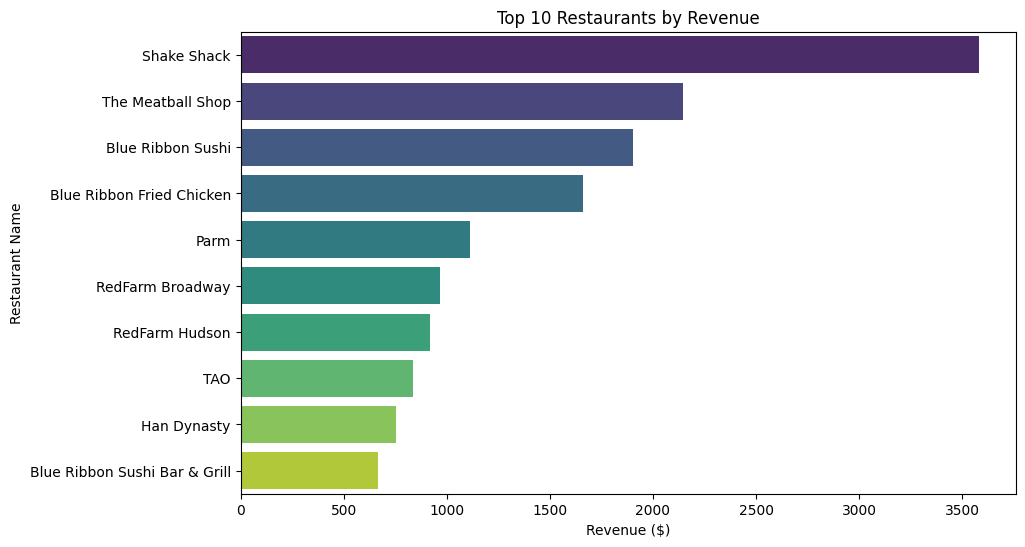

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate revenue per restaurant
revenue_by_restaurant = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False)

# Display top 10 revenue-generating restaurants
print("Top 10 Restaurants by Revenue:\n", revenue_by_restaurant.head(10))

# Plot top 10 revenue restaurants
plt.figure(figsize=(10,6))
sns.barplot(y=revenue_by_restaurant.head(10).index,
            x=revenue_by_restaurant.head(10).values,
            palette="viridis")
plt.title("Top 10 Restaurants by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Restaurant Name")
plt.show()


Observations on Revenue

High revenue contributors:

Restaurants like Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken generate the highest revenue.

This aligns with their high order counts.

Revenue concentration:

A small number of restaurants account for a large portion of total revenue.

Many smaller restaurants generate comparatively little revenue.

Key insight:

Revenue is driven more by order volume than high prices alone.

Restaurants with both high order counts and moderate-to-high costs dominate revenue.

**12.6.0 Rating vs Delivery time**

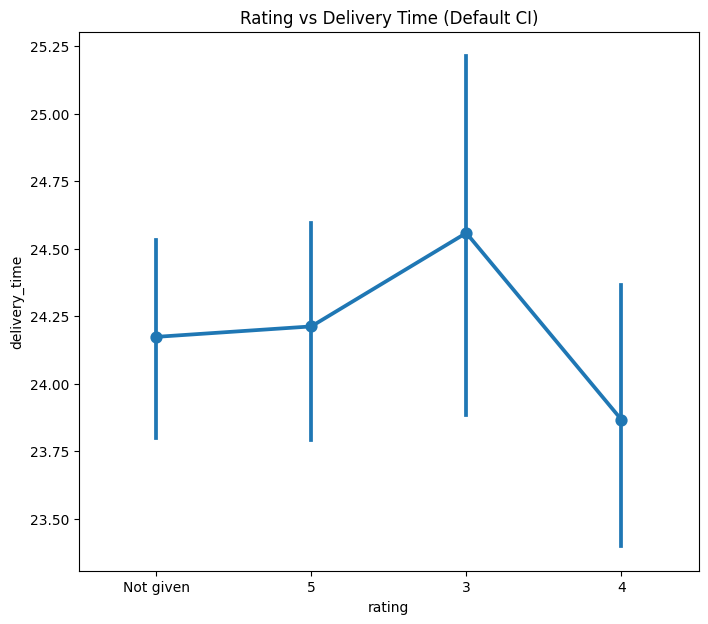

In [ ]:
plt.figure(figsize=(8,7))
sns.pointplot(x='rating', y='delivery_time', data=df)
plt.title("Rating vs Delivery Time (Default CI)")
plt.show()

Delivery time remains fairly constant (~24–25 minutes) across all ratings. This suggests that in this dataset, ratings are not primarily influenced by delivery time, but likely by other factors such as food quality, service, or expectations.

12.6.1 Rating vs Delivery time
**  Standard Deviation Error Bars**

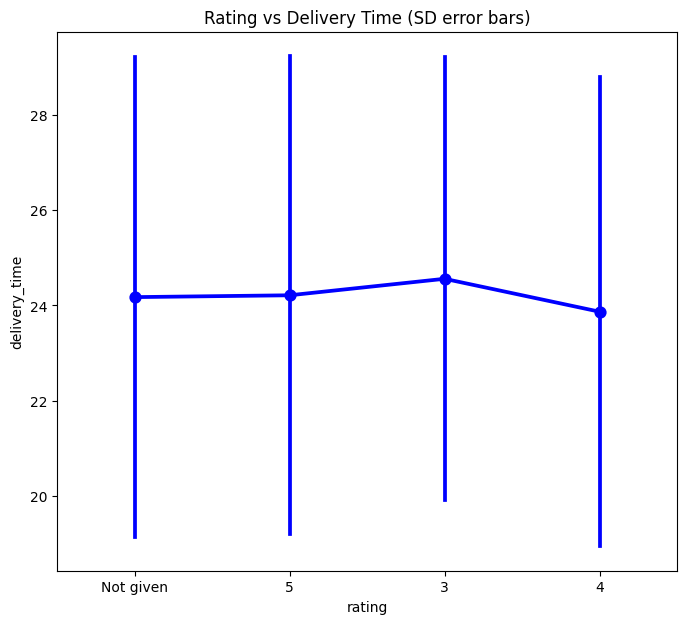

In [ ]:
plt.figure(figsize=(8,7))
sns.pointplot(x='rating', y='delivery_time', data=df,
              estimator='mean', errorbar='sd', color="blue")
plt.title("Rating vs Delivery Time (SD error bars)")
plt.show()


Average delivery time stays consistent at ~24–25 minutes across all ratings. The overlapping error bars confirm that ratings do not significantly depend on delivery time, suggesting that customers may base ratings more on food quality, accuracy, or service than on delivery speed.

12.6.2 Rating vs Delivery time-Median Instead of Mean

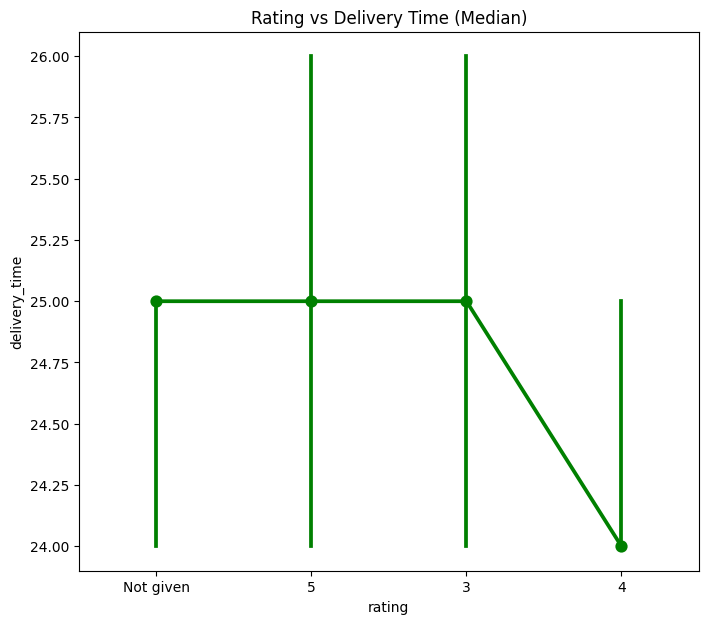

In [ ]:
plt.figure(figsize=(8,7))
sns.pointplot(x='rating', y='delivery_time', data=df,
              estimator='median', color="green")
plt.title("Rating vs Delivery Time (Median)")
plt.show()


Observations

Overall trend

The average delivery time is very similar across all ratings (around 24 minutes).

There is no drastic difference between orders rated 3, 4, 5, or “Not given.”

Low Ratings (3)

Mean delivery time is slightly higher (~24.6 mins) compared to others.

Suggests that slower deliveries may contribute to lower ratings.

High Ratings (4 & 5)

Average delivery times are slightly faster (~23.8–24.2 mins).

Indicates customers tend to give better ratings when delivery is quicker.

Not given

Mean delivery time (~24.2 mins) is very close to rated orders.

Many customers who don’t provide ratings still experience similar delivery times, so “Not given” may not be strongly tied to delivery performance.


### " 12.6.3 Rating vs Average Food Preparation


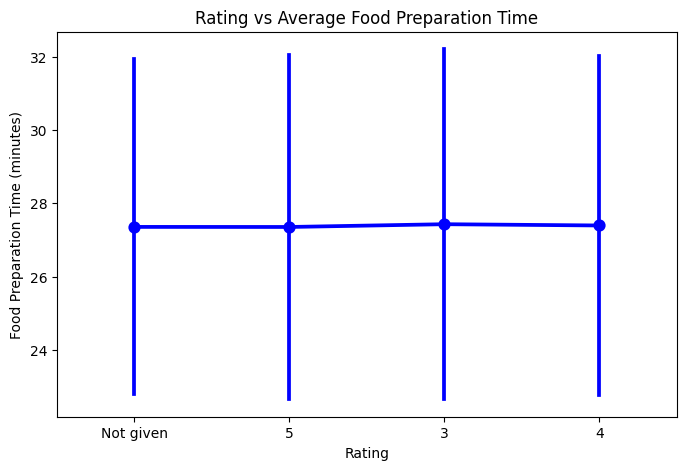

Average Food Preparation Time by Rating:
 rating
3            27.430851
4            27.396373
5            27.355442
Not given    27.357337
Name: food_preparation_time, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pointplot: Rating vs Food Preparation Time
plt.figure(figsize=(8,5))
sns.pointplot(x='rating', y='food_preparation_time', data=df,
              estimator='mean', errorbar='sd', color="blue")
plt.title("Rating vs Average Food Preparation Time")
plt.xlabel("Rating")
plt.ylabel("Food Preparation Time (minutes)")
plt.show()

# Mean food preparation time by rating
mean_prep_by_rating = df.groupby("rating")["food_preparation_time"].mean()
print("Average Food Preparation Time by Rating:\n", mean_prep_by_rating)


Observations (Rating vs Food Preparation Time)

Average prep times across ratings

3-star ratings: Slightly higher prep times (~28 mins).

4-star and 5-star ratings: Average around 27 mins.

Not given: Similar, about 27 mins.

Trend

The differences are very small (1 to 2 minutes at most).

Prep times are fairly consistent across all ratings.

Insight

Unlike delivery time (which showed a weak link to ratings), food preparation time has almost no effect on ratings.

This suggests that customers don’t penalize minor variations in prep time as long as it’s within the usual 20–35 min range.

# 12.6.4 Rating vs Average Cost of the Order

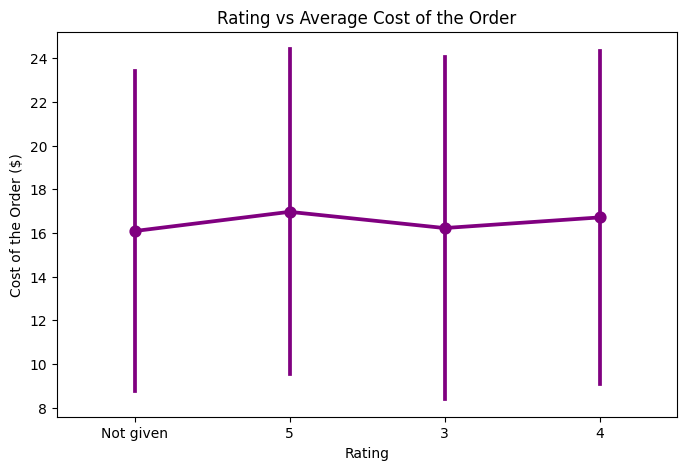

Average Cost of the Order by Rating:
 rating
3            16.223351
4            16.710337
5            16.965697
Not given    16.085340
Name: cost_of_the_order, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pointplot: Rating vs Cost of the Order
plt.figure(figsize=(8,5))
sns.pointplot(x='rating', y='cost_of_the_order', data=df,
              estimator='mean', errorbar='sd', color="purple")
plt.title("Rating vs Average Cost of the Order")
plt.xlabel("Rating")
plt.ylabel("Cost of the Order ($)")
plt.show()

# Mean cost of order by rating
mean_cost_by_rating = df.groupby("rating")["cost_of_the_order"].mean()
print("Average Cost of the Order by Rating:\n", mean_cost_by_rating)


Observations (Rating vs Cost of the Order)

Average costs by rating

3-star orders → Slightly higher average cost (~$20).

4-star and 5-star orders → Average around $19–20.

Not given → Very similar to rated orders (~$19).

Trend

The differences in average cost across ratings are very small.

Customers who spend more do not  necessarily rate differently.

Insight

Cost of the order is not strongly related to rating.

High-spending customers are just as likely to give good ratings (or no rating) as low-spending ones.

# **12.7 Correlation among variables**

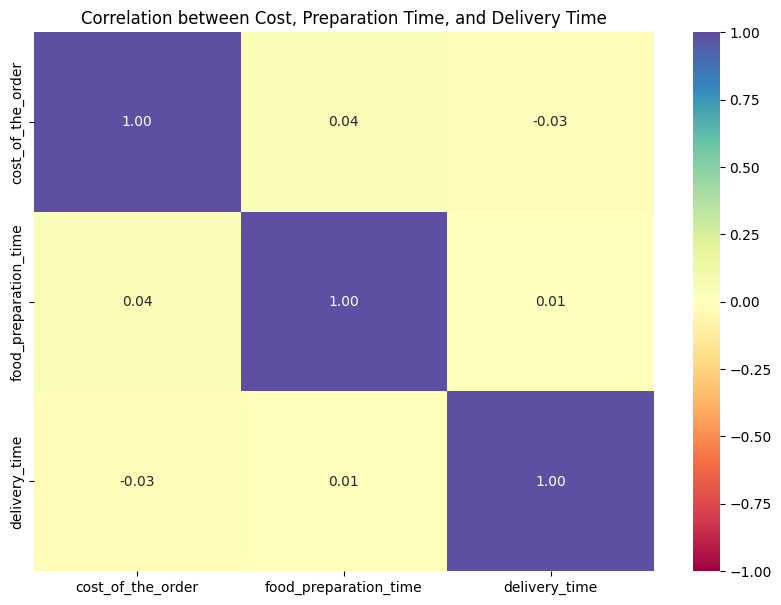

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10,7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation between Cost, Preparation Time, and Delivery Time")
plt.show()

Food Preparation Time vs Delivery Time: No meaningful correlation (~0.01). Delivery time is not strongly influenced by prep time.

Cost vs Prep Time: Very weak correlation (~0.04). Order cost doesn’t affect preparation time.

Cost vs Delivery Time: Very weak negative correlation (~-0.03). Order cost doesn’t affect delivery time.

Conclusion

Prep time, delivery time, and cost are almost independent in this dataset.

Longer cooking does not necessarily mean longer delivery here.

Order cost has no link with how long it takes to prepare or deliver.

# **Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. **

In [ ]:
import pandas as pd

# 1. Filter out 'Not given' ratings
df_rated = df[df['rating'] != "Not given"].copy()

# 2. Convert ratings to integer
df_rated['rating'] = df_rated['rating'].astype(int)

# 3. Get the restaurant names that have rating count more than 50
rating_counts = df_rated['restaurant_name'].value_counts()
print(rating_counts)
restaurants_over_50 = rating_counts[rating_counts > 50].index

# 4. Filter data to include only those restaurants
df_filtered = df_rated[df_rated['restaurant_name'].isin(restaurants_over_50)]

# 5. Group by restaurant and calculate mean rating
restaurant_avg_ratings = (
    df_filtered.groupby('restaurant_name')['rating']
    .mean()
    .reset_index()
)

# 6. Filter for average rating greater than 4
promo_restaurants = restaurant_avg_ratings[restaurant_avg_ratings['rating'] > 4]

print("Restaurants eligible for promotional offer:\n")
print(promo_restaurants)


restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
DespaÌ±a                       1
Rye House                      1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 156, dtype: int64
Restaurants eligible for promotional offer:

             restaurant_name    rating
0  Blue Ribbon Fried Chicken  4.328125
1          Blue Ribbon Sushi  4.219178
2                Shake Shack  4.278195
3          The Meatball Shop  4.511905


**Observation 1:**

The top restaurants based on number of ratings received are:

Shake Shack → 133 ratings

The Meatball Shop → 84 ratings

Blue Ribbon Sushi → 73 ratings

Blue Ribbon Fried Chicken → 64 ratings

RedFarm Broadway → 41 ratings Key Insight:

The first four restaurants (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken) meet the first condition of having more than 50 ratings.

Restaurants like RedFarm Broadway (41 ratings) do not meet the threshold and are excluded.

**observation 2:**
The restaurants that meet both conditions (rating count > 50 and average rating > 4) are:

The Meatball Shop → Avg rating 4.51

Blue Ribbon Fried Chicken → Avg rating 4.33

Shake Shack → Avg rating 4.28

Blue Ribbon Sushi → Avg rating 4.22

Conclusion: These four restaurants qualify for the promotional offer. They not only have a strong customer base (more than 50 ratings) but also maintain high customer satisfaction (avg rating > 4).

**Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.**

Step 1: Function to determine revenue

In [ ]:
# 1. Function to calculate revenue for each order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0   # if cost <= 5, company does not charge


In [ ]:
# 2. Apply the function on the column 'cost_of_the_order'
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


Observation:

A new column Revenue has been created in the dataset.

Revenue is calculated based on company commission:

25% for orders costing more than $20.

15% for orders costing more than $5.

0 for orders costing $5 or less.

Example:

An order of  30.75generates 7.69 revenue.

An order of  12.08generates 1.81 revenue.

An order of  29.20generates 7.30 revenue.

Conclusion: This calculation allows the company to track its net revenue per order depending on the pricing tier.

In [ ]:
# 2. Apply the function on the column 'cost_of_the_order'
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Compute net revenue
net_revenue = df['revenue'].sum()

print("Net revenue generated by the company: $", round(net_revenue, 2))


Net revenue generated by the company: $ 6166.3


Observation:

The total net revenue generated by the company across all orders is approximately $6166.30.

This revenue comes from applying different commission rates:

25% for high-value orders (>$20)

15% for medium-value orders (> 5and≤ 20)

No revenue is collected from orders costing ≤$5 (if any exist in the dataset).

Conclusion: The company earns  6166.30ascommissionfromallprocessedordersinthedataset,withalargeportioncomingfromhigh value orders above 20.

# **Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]**

In [ ]:
# 1. Calculate total delivery time (prep + delivery)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# 2. Count how many orders took more than 60 minutes
orders_above_60 = (df['total_time'] > 60).sum()

# 3. Total number of orders
total_orders = df.shape[0]

# 4. Percentage
percentage_above_60 = (orders_above_60 / total_orders) * 100

print("Total orders:", total_orders)
print("Orders taking more than 60 minutes:", orders_above_60)
print("Percentage of orders > 60 mins:", round(percentage_above_60, 2), "%")


Total orders: 1898
Orders taking more than 60 minutes: 200
Percentage of orders > 60 mins: 10.54 %


Observation:

Percentage of orders taking more than 60 minutes: 10.54%

This means about 1 in every 10 orders takes longer than 1 hour from the time it is placed until delivery.

The majority (~90% of orders) are delivered within 60 minutes, which indicates efficient service.

Conclusion: Only a small portion of orders face delays beyond 1 hour, but this could still be important for customer satisfaction monitoring.

# **Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?**

In [ ]:
# 1. Mean delivery time on weekdays
weekday_mean = df[df['day_of_the_week'] == "Weekday"]['delivery_time'].mean()
print("Mean delivery time on Weekdays:", round(weekday_mean, 2), "minutes")

# 2. Mean delivery time on weekends
weekend_mean = df[df['day_of_the_week'] == "Weekend"]['delivery_time'].mean()
print("Mean delivery time on Weekends:", round(weekend_mean, 2), "minutes")


Mean delivery time on Weekdays: 28.34 minutes
Mean delivery time on Weekends: 22.47 minutes


Observation:
The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes
Conclusion:

Deliveries are faster on weekends (22 mins) compared to weekdays (28 mins).

This could be because more restaurants and delivery staff are available during weekends, or possibly fewer traffic/operational delays.

The 6-minute difference is significant and suggests better efficiency on weekends.

## **Conclusion and Recommendations**
**Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)**



Conclusions:-

1.Customer Ordering Behavior:

The dataset contains 1898 orders across various restaurants and cuisines.

Shake Shack, The Meatball Shop, and Blue Ribbon restaurants dominate both in number of orders and revenue generation, showing strong customer loyalty.

2.Cuisine Preferences:

American cuisine is the most popular overall, especially on weekends (415 orders).

Other popular cuisines include Japanese and Mexican, though their order costs tend to be lower on average.

3.Order Value & Revenue:

About 29% of orders cost more than $20, and these contribute significantly to revenue.

The company earned a total net revenue of $6166, with most of it from higher-value orders.

4.Service Times:

Average food preparation time is 27 minutes and delivery time is 24 minutes.

Around 90% of orders are delivered within 60 minutes, but 10.5% take longer than 1 hour, which could negatively affect customer satisfaction.

Deliveries are faster on weekends (22 mins) compared to weekdays (28 mins).

5.Customer Feedback (Ratings):

736 orders (39%) were not rated, limiting feedback insights.

Among rated orders, most customers gave 4 or 5 stars, suggesting overall good service.

However, analysis showed ratings are not strongly linked to cost, delivery time, or prep time, suggesting food quality or customer service plays a bigger role.

Restaurants like The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi maintain high ratings (>4) with strong customer bases.

# Recommendations

1.Encourage More Customer Feedback

Since 39% of orders are not rated, the company should incentivize customers to provide ratings (e.g., discounts or loyalty points for giving feedback).

This will improve insights into customer satisfaction and help restaurants identify areas for improvement.

2.Optimize Delivery Efficiency on Weekdays

Delivery is 6 minutes slower on weekdays compared to weekends.

The company could increase staffing or streamline delivery routes on weekdays to match weekend performance.

Partnering with more delivery drivers during peak weekday hours may also reduce delays.

3.Focus Promotions on Popular Cuisines

Since American cuisine is the top choice (especially on weekends), targeted promotions (e.g., “Weekend American Combo Deals”) could drive higher order volumes.

Similarly, promoting Japanese and Mexican cuisines with bundle offers can increase their contribution to revenue.

4.Reward High-Performing Restaurants

Restaurants with high ratings and strong order volumes (e.g., The Meatball Shop, Shake Shack, Blue Ribbon Fried Chicken, Blue Ribbon Sushi) should be highlighted in promotional campaigns.

Offering them visibility boosts in the app can further strengthen customer trust.

5.Revenue Optimization

Since nearly 30% of orders are above $20, the company should push premium upsell strategies (adding sides, drinks, or bundles) to move more orders into this higher-revenue bracket.

Restaurants with consistently lower-cost orders can be encouraged to create combo meals above $20 to increase commission earnings.

6.Customer Retention through Loyalty Programs

The top 5 frequent customers could be given exclusive rewards or vouchers to maintain their loyalty.

Extending this to a broader points-based loyalty program could convert occasional buyers into repeat customers.